In [2]:
!pip install gdown 
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /Users/Sherri/Desktop/LSTM-article/the_repo/london_bike_sharing.csv
100%|██████████████████████████████████████| 1.03M/1.03M [00:00<00:00, 4.04MB/s]


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters


/Users/Sherri/anaconda3/envs/opencv-New/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 18, 10

In [5]:
df = pd.read_csv(
  "london_bike_sharing.csv", 
  parse_dates=['timestamp'], 
  index_col="timestamp"
)

In [6]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

In [8]:
df.head(
)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,2015


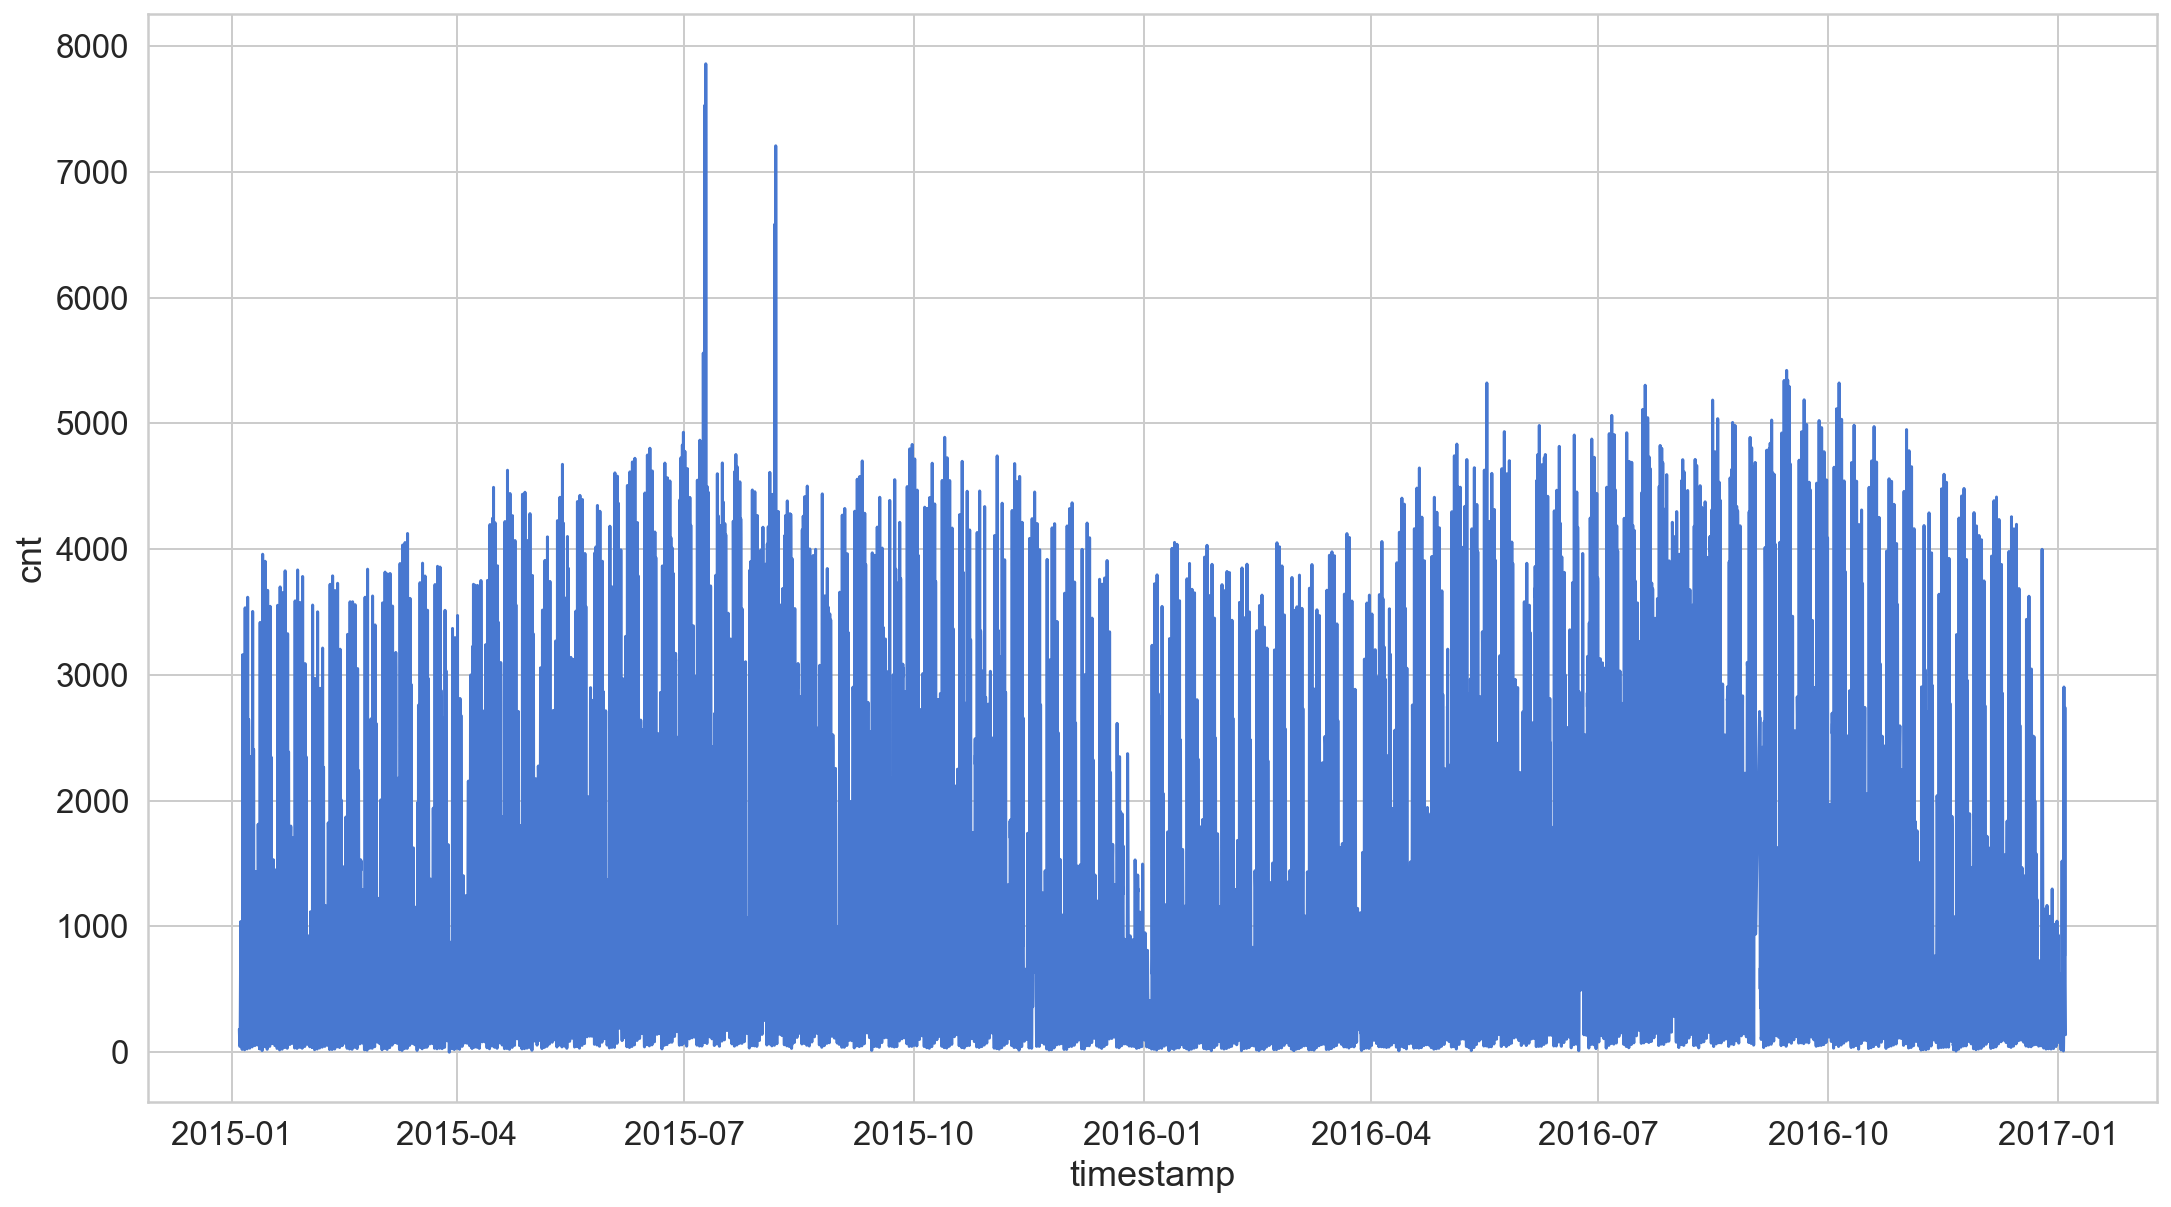

In [9]:
sns.lineplot(x=df.index, y="cnt", data=df);

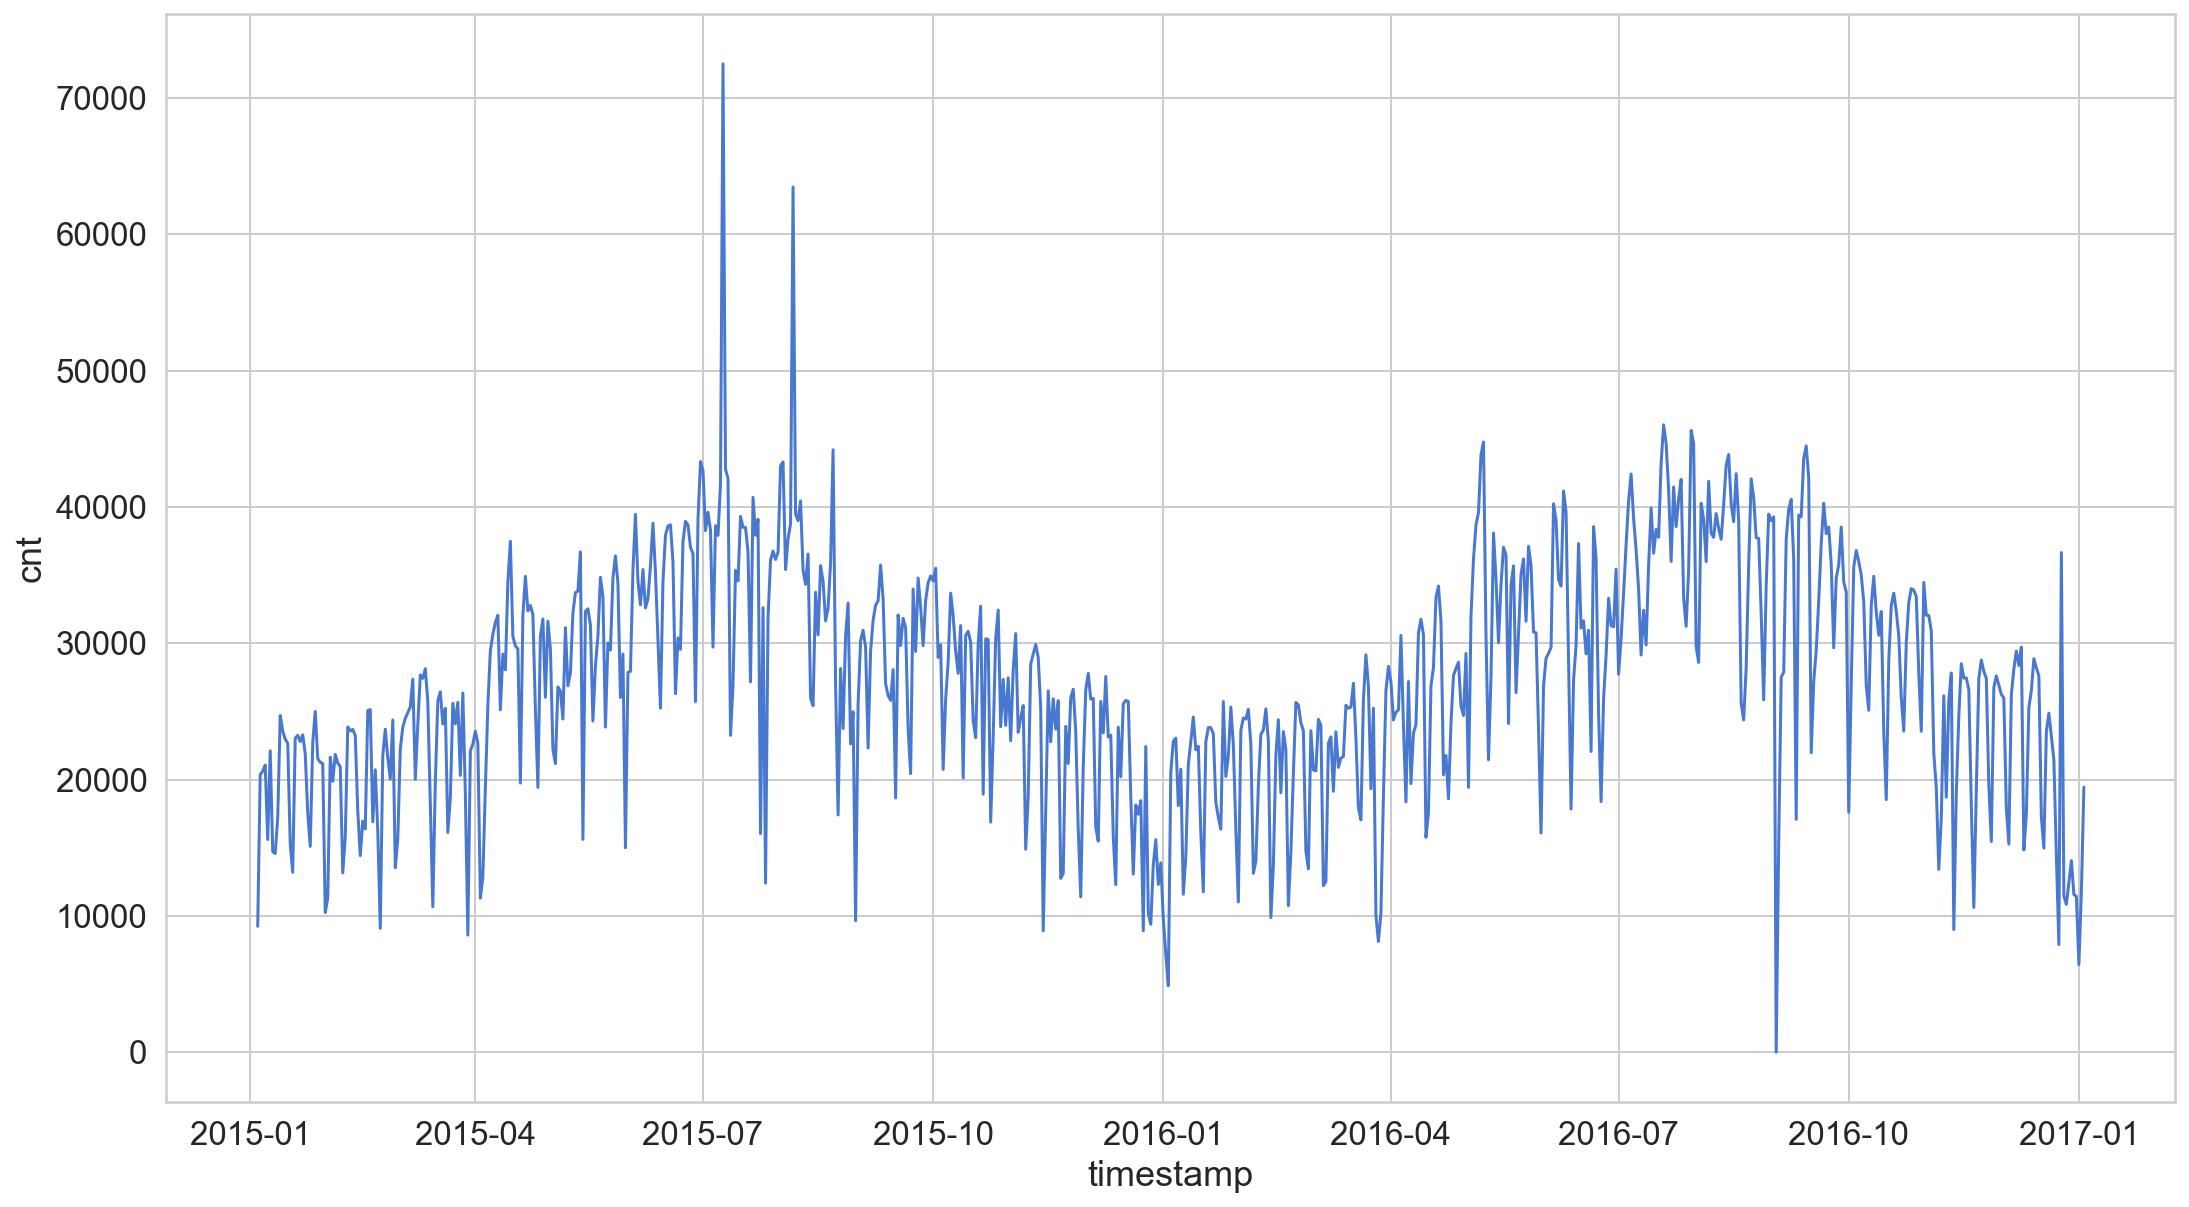

In [10]:
df_by_month = df.resample('D').sum()
sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

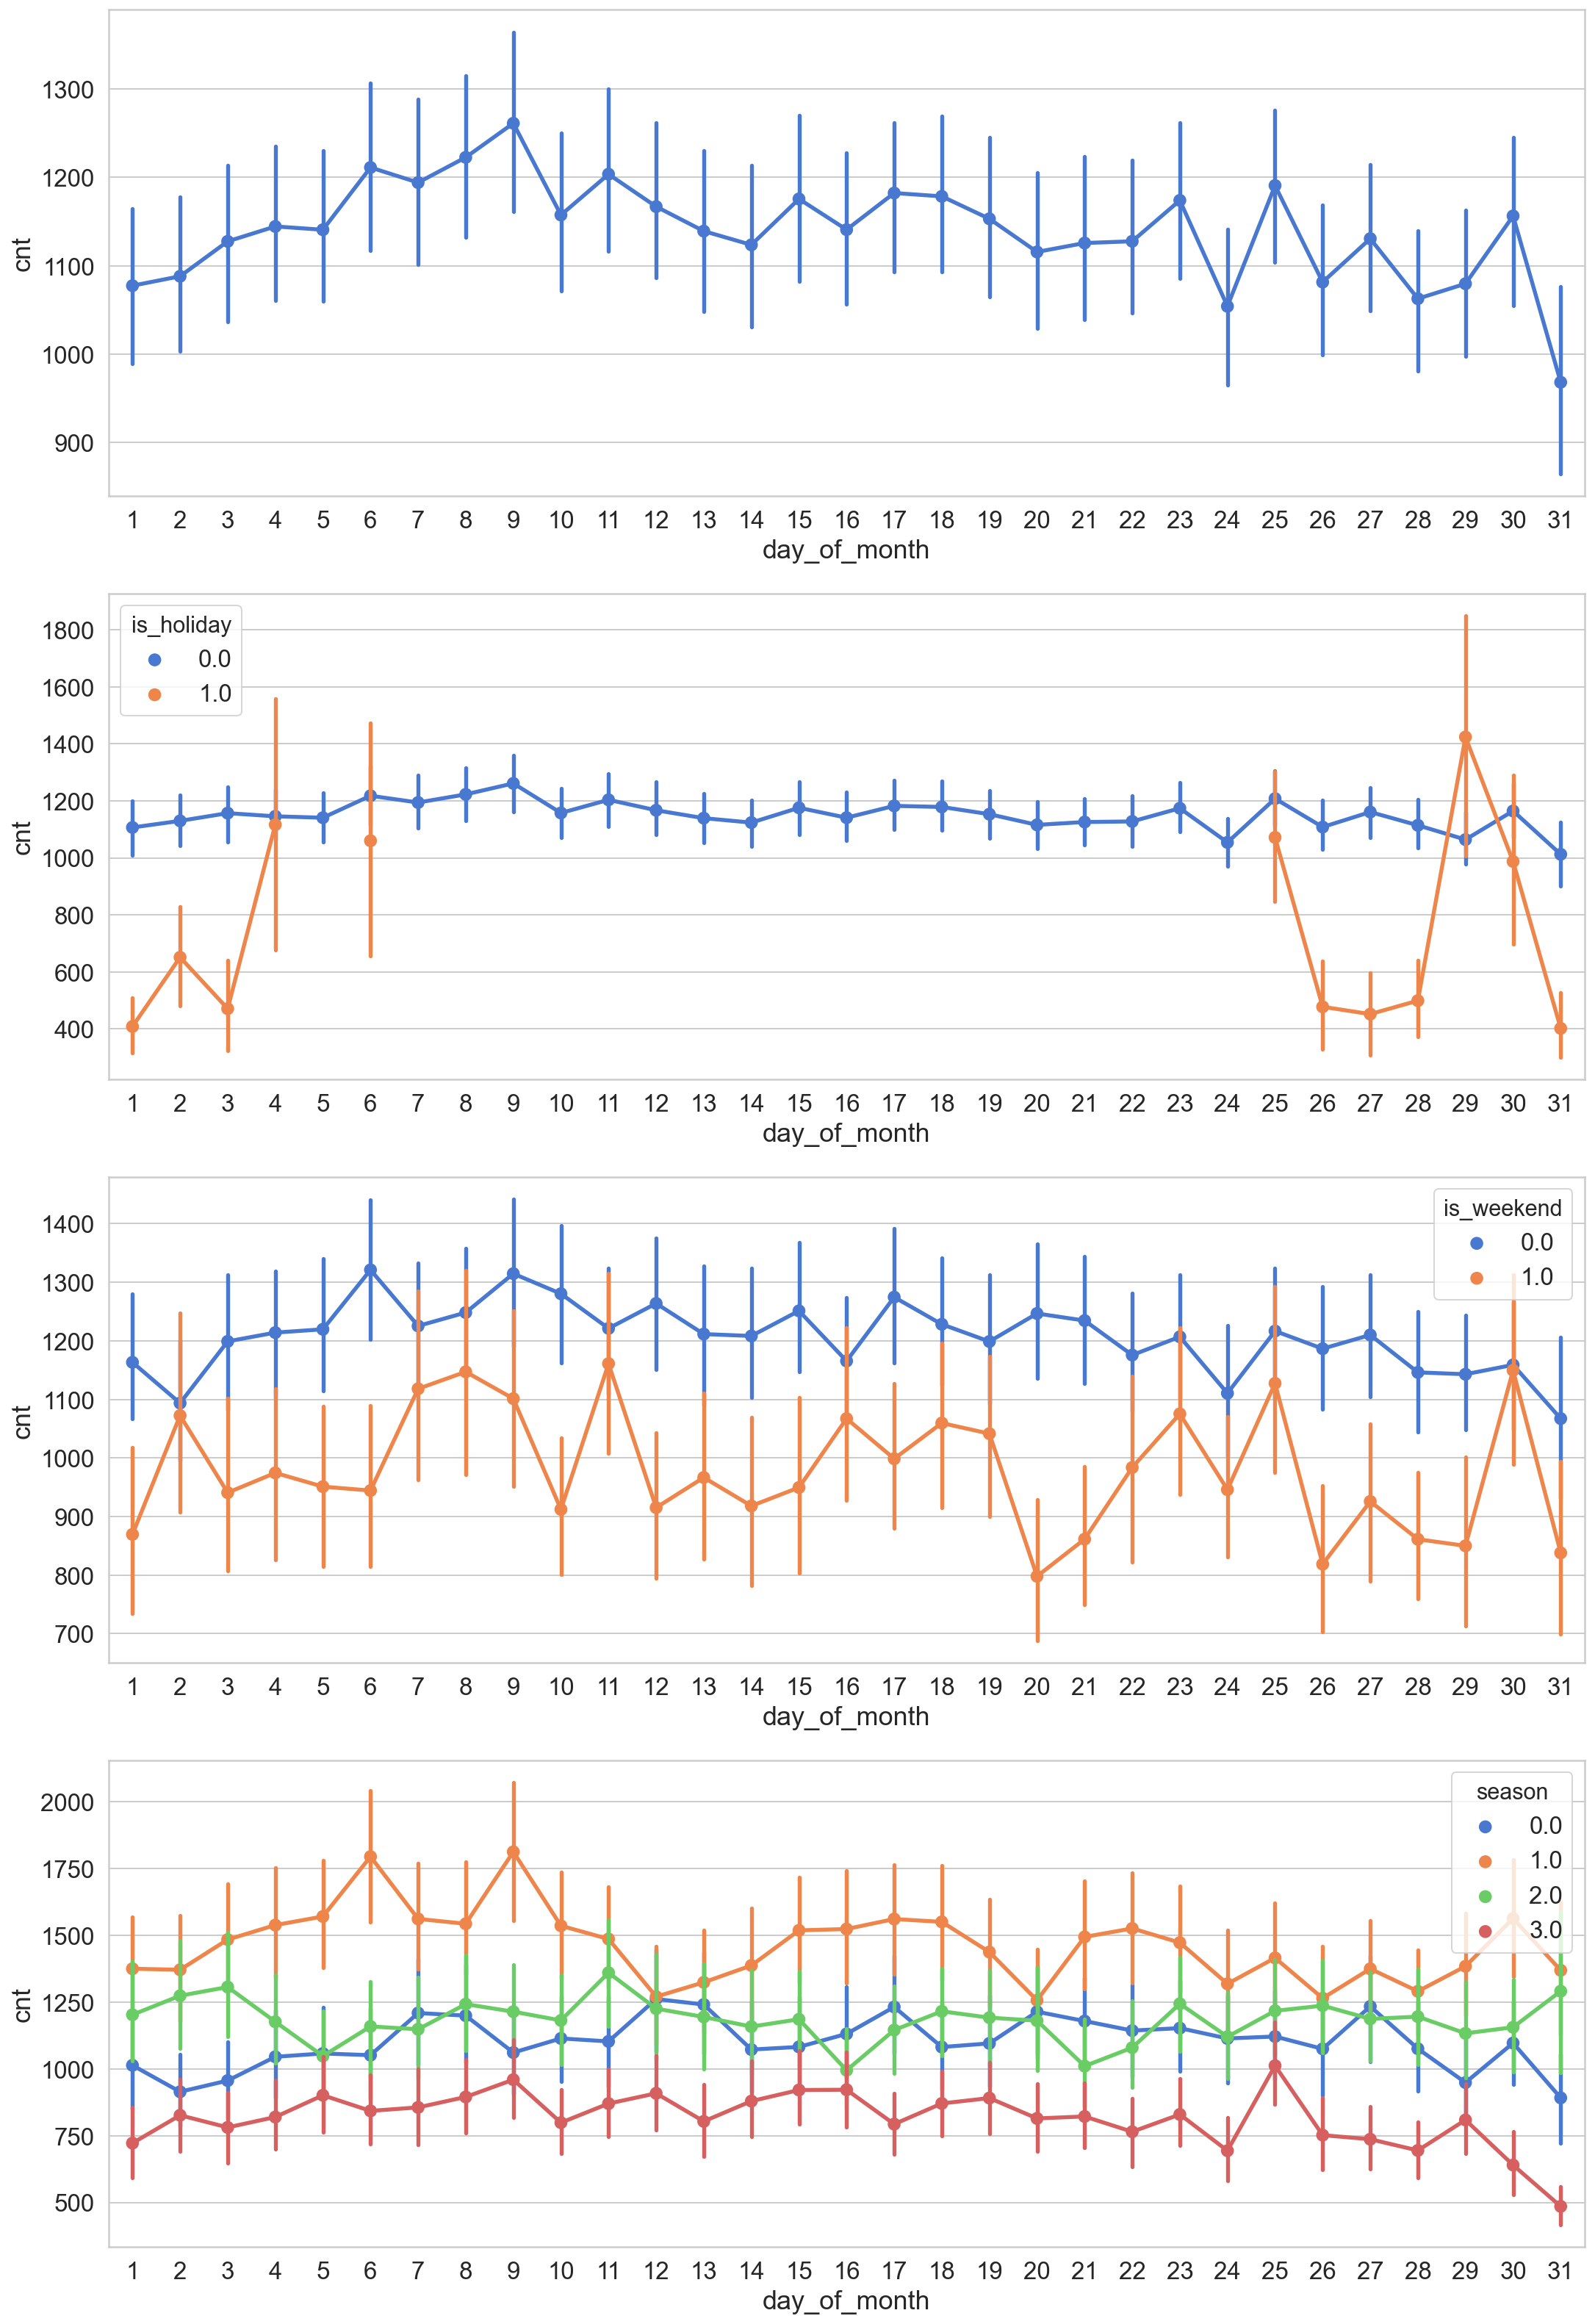

In [11]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18, 28)

x= "day_of_month"
sns.pointplot(data=df, x=x, y='cnt', ax=ax1);
sns.pointplot(data=df, x=x, y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x=x, y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x=x, y='cnt', hue='season', ax=ax4);

In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,2015


In [13]:
df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')

df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['season'], drop_first=True, prefix='seas')
df = pd.get_dummies(df, columns=['weather_code'], drop_first=True, prefix='code')

In [14]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [15]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']
#f_columns = train.columns
f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

In [16]:
f_columns

['t1', 't2', 'hum', 'wind_speed']

In [17]:
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/Users/Sherri/anaconda3/envs/opencv-New/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/Sherri/anaconda3/envs/opencv-New/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Sherri/anaconda3/envs/opencv-New/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [21]:

train.head()
len(train)

15672

In [22]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [29]:
time_steps = 40

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15632, 40, 37) (15632,)


numpy.ndarray

In [30]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,
                                    input_shape=(X_train.shape[1], X_train.shape[2])
         )
         )
         
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
   # validation_split=0.1,
    validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/30
489/489 [==============================] - 17s 31ms/step - loss: 0.4494 - val_loss: 0.1077
Epoch 2/30
489/489 [==============================] - 11s 22ms/step - loss: 0.1057 - val_loss: 0.0478
Epoch 3/30
 73/489 [===>..........................] - ETA: 9s - loss: 0.0591

KeyboardInterrupt: 

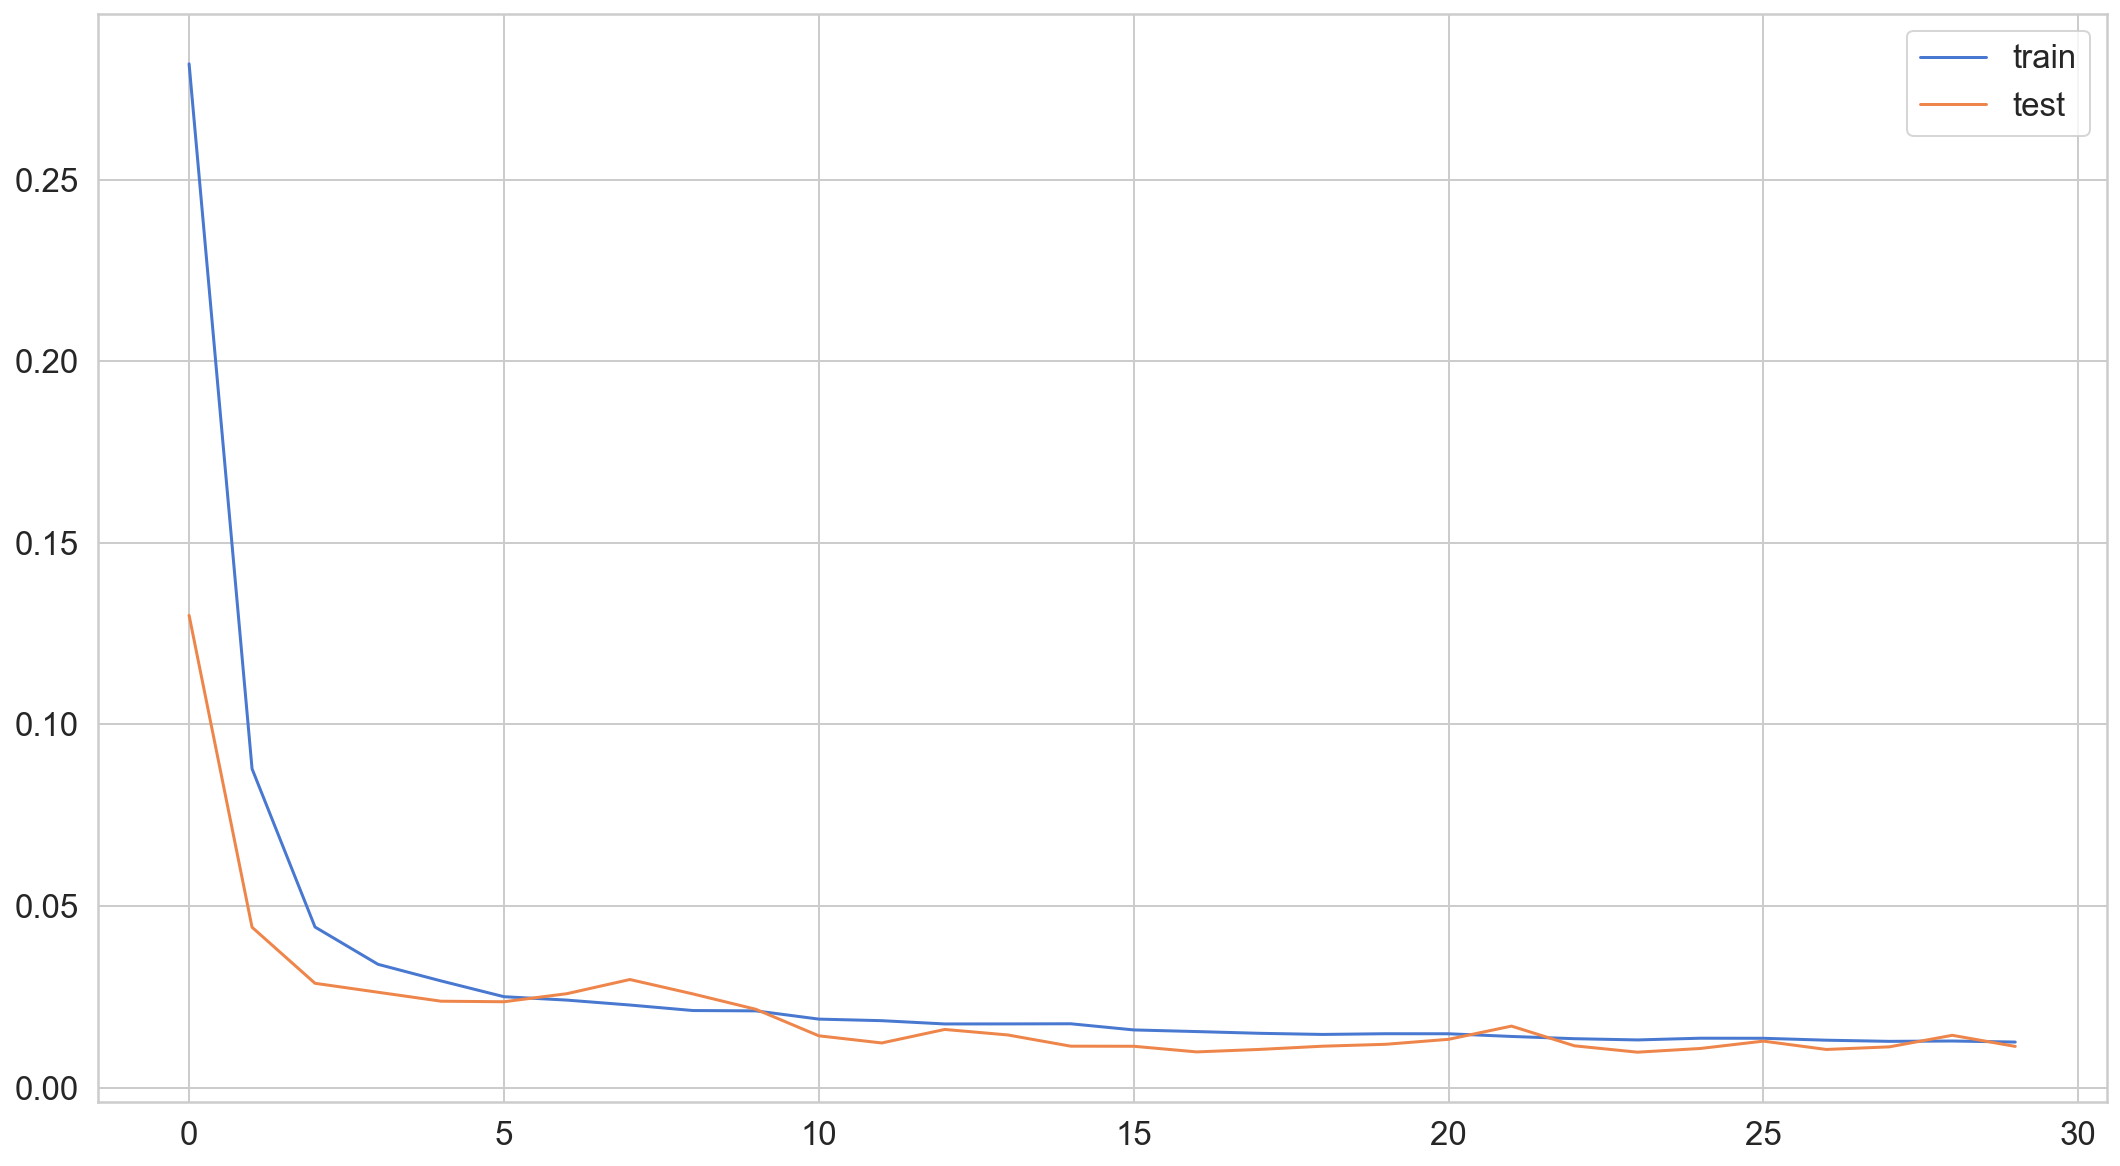

In [151]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [91]:
y_pred = model.predict(X_test)

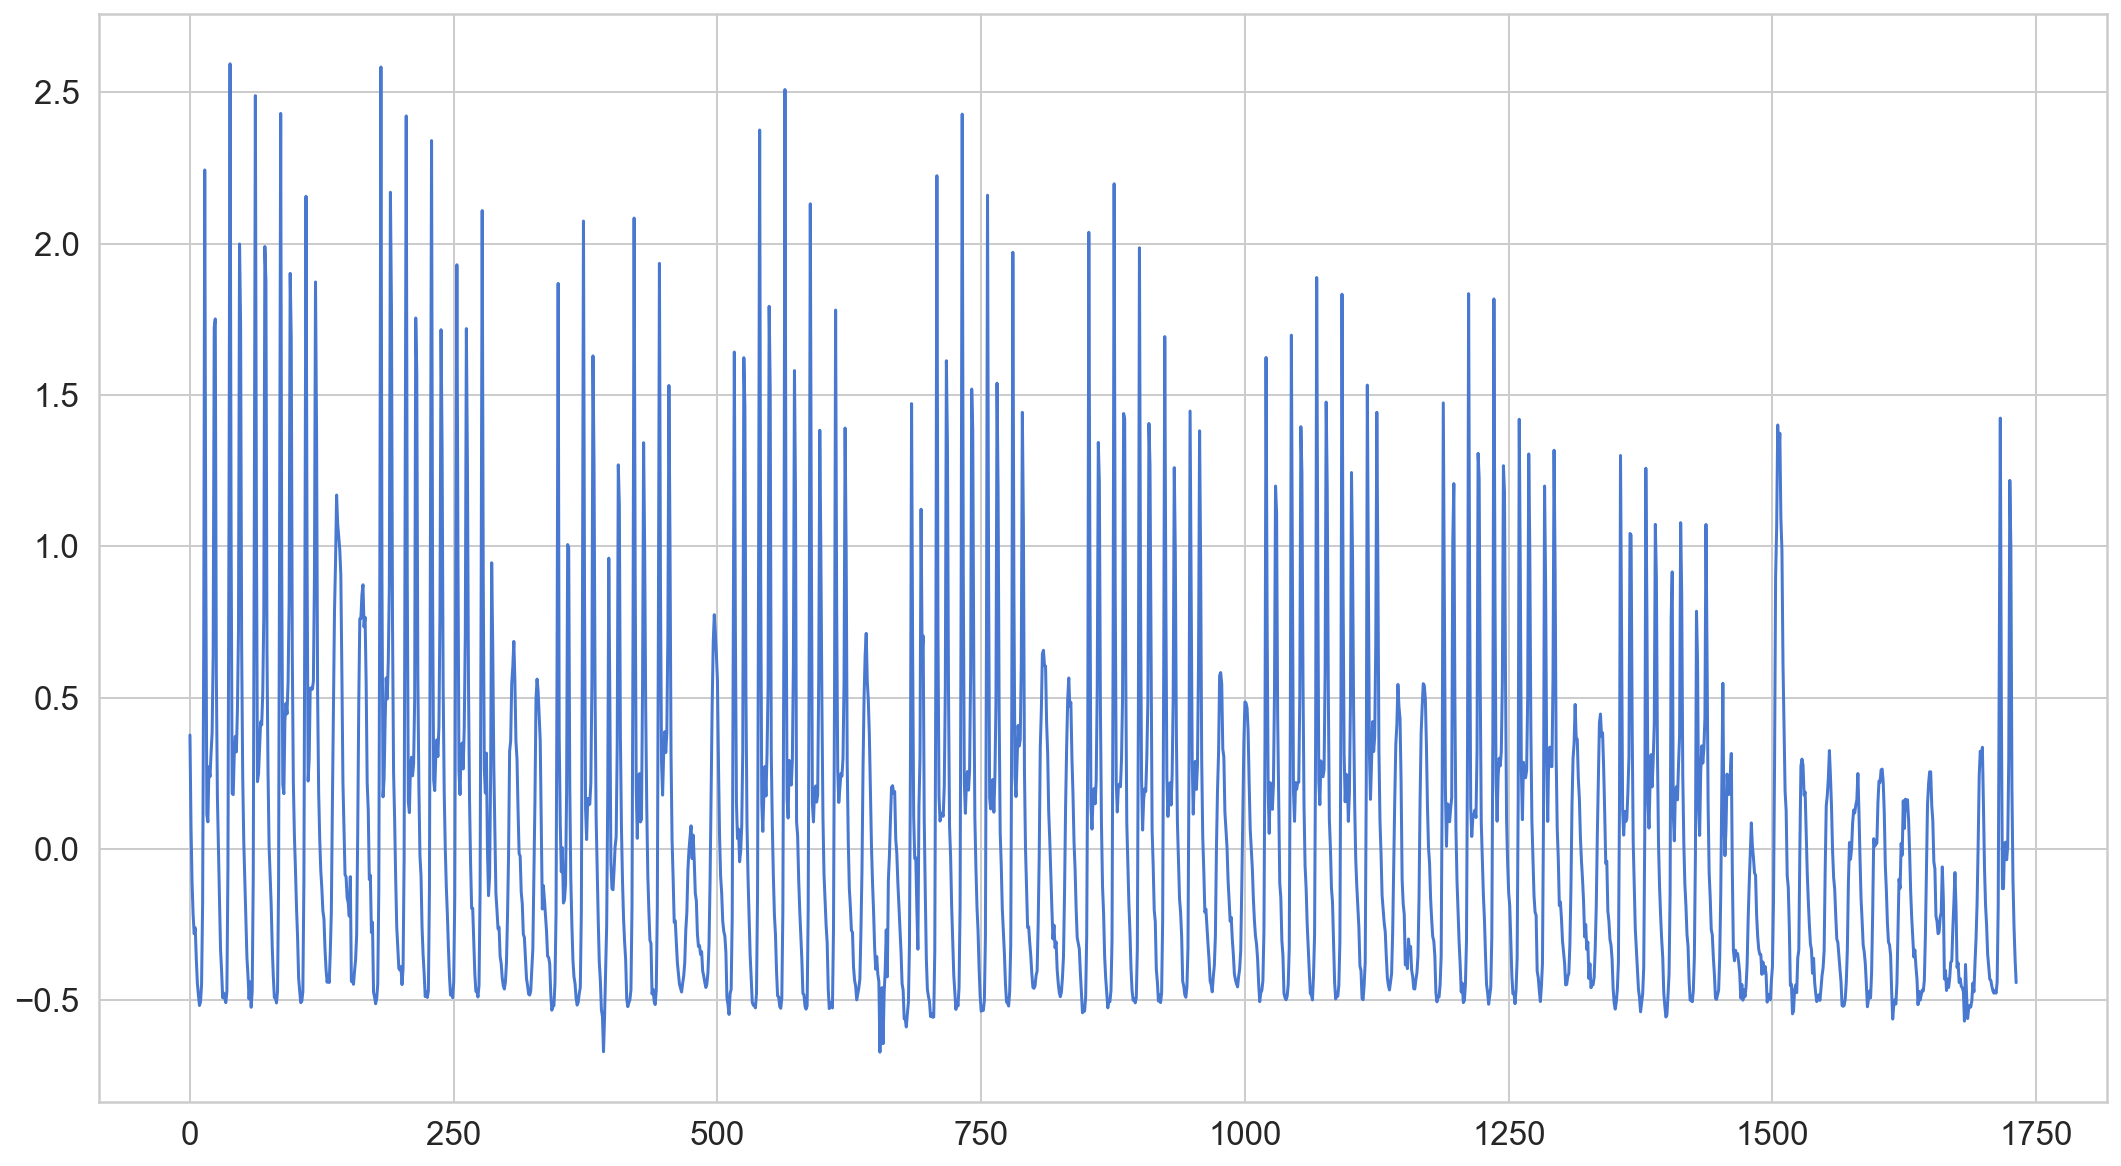

In [43]:
plt.plot(y_pred)

In [65]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

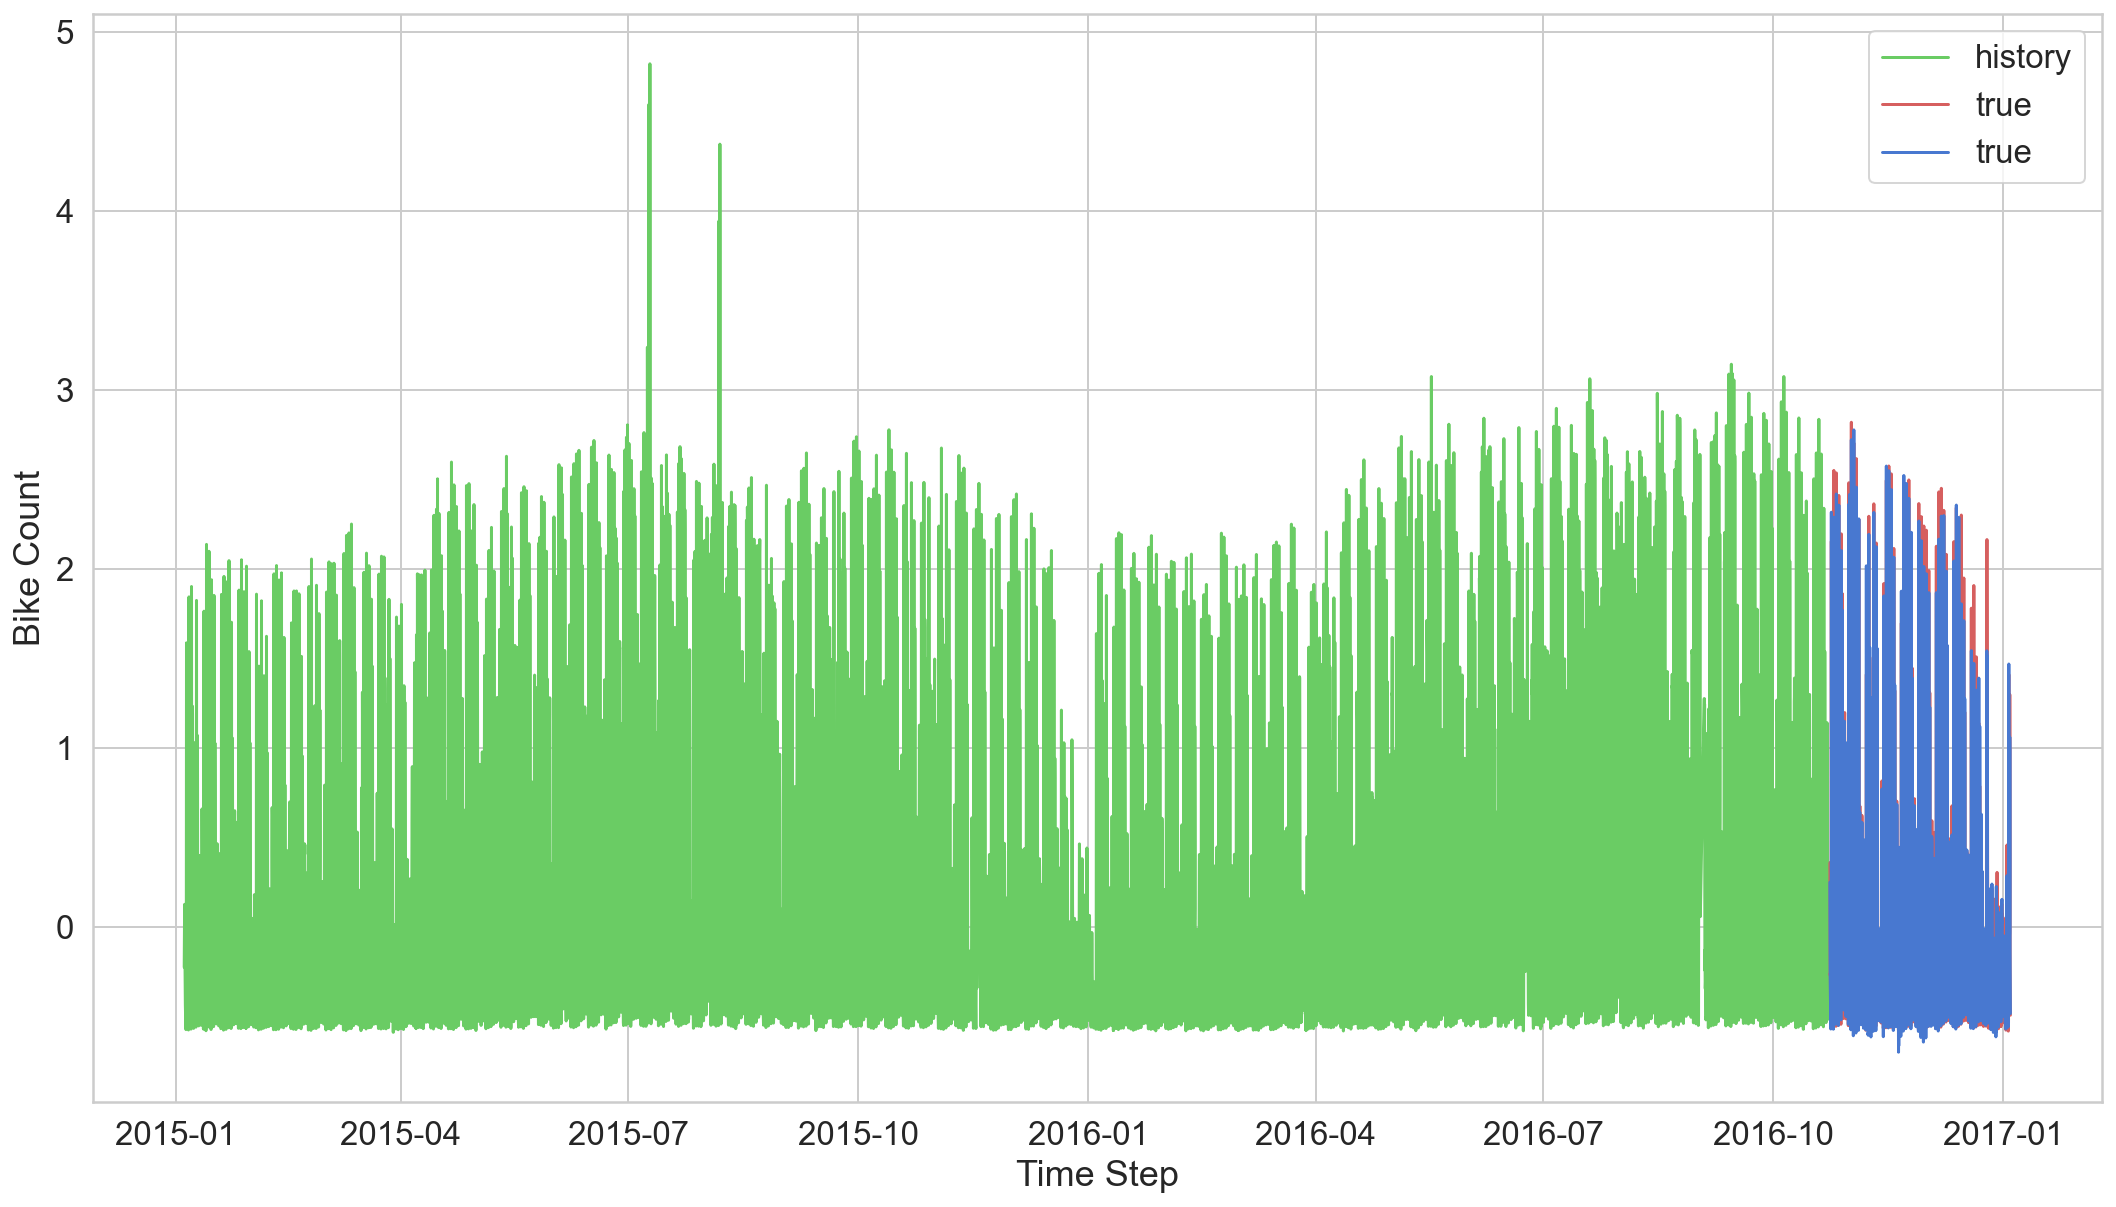

In [66]:
plt.plot(train.index[time_steps:], y_train_inv.flatten(), 'g', label="history")
plt.plot(test.index[time_steps:],y_test_inv.flatten(), 'r', label="true")
plt.plot(test.index[time_steps:],y_pred_inv.flatten(), 'b', label="true")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();